Importo las librerias que voy a usar

In [83]:
#Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

Leo mi conjunto de datos. Puede que necesites cambiar el path del documento

In [110]:
# Read Dataset
#dataset = pd.read_csv('C:\\Users\\lsanc\\Desktop\\Jupyter Notebooks\\Practica 1 ML\\agaricus-lepiota.data',delimiter=',',header=0)
dataset = pd.read_csv('C:\\Users\\lsanc\\Desktop\\Jupyter Notebooks\\Practica 1 ml clase\\Otro\\agaricus-lepiota.data',delimiter=',',header=0)
dataset

,Type,Cap shape,Cap surface,Cap color,Bruises,Odor,Gill attachment,Gill spacing,Gill size,Gill color,...,Stalk surface below ring,Stalk color above ring,Stalk color below ring,Veil type,Veil color,Ring Number,Ring type,Spore print color,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [111]:
print(dataset.describe()) #Descripción de los datos

        Type Cap shape Cap surface Cap color Bruises  Odor Gill attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       Gill spacing Gill size Gill color   ...   Stalk surface below ring  \
count          8124      8124       8124   ...                       8124   
unique            2         2         12   ...                          4   
top               c         b          b   ...                          s   
freq           6812      5612       1728   ...                       4936   

       Stalk color above ring Stalk color below ring Veil type Veil color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1       

In [112]:
# Header
header = []
for row in dataset:
    header.append(row)
header

['Type',
 'Cap shape',
 'Cap surface',
 'Cap color',
 'Bruises',
 'Odor',
 'Gill attachment',
 'Gill spacing',
 'Gill size',
 'Gill color',
 'Stalk shape',
 'Stalk root',
 'Stalk surface above ring',
 'Stalk surface below ring',
 'Stalk color above ring',
 'Stalk color below ring',
 'Veil type',
 'Veil color',
 'Ring Number',
 'Ring type',
 'Spore print color',
 'Population',
 'Habitat']

In [113]:
Dibujo los gráficos de barras de las variables

SyntaxError: invalid syntax (<ipython-input-113-0a7b0846ff9d>, line 1)

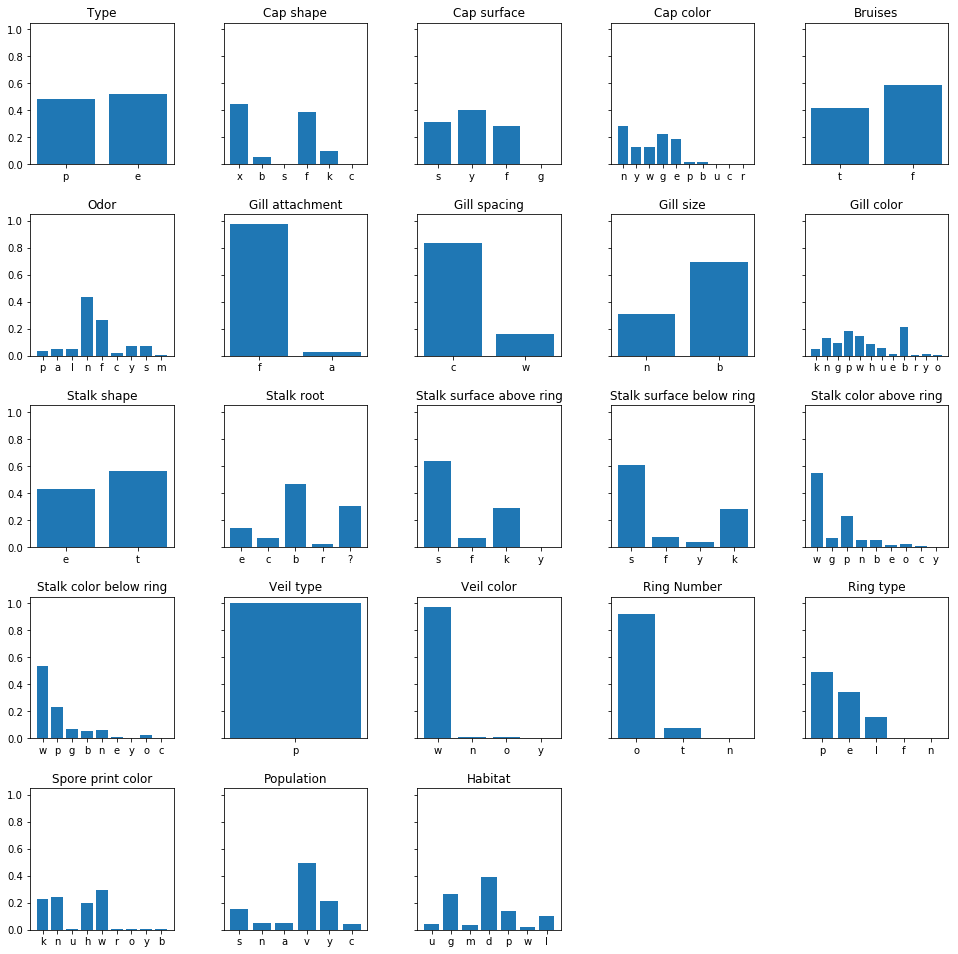

In [114]:
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

fig,axs=plt.subplots(5,5, figsize=(15,15), sharey=True)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)

axs=trim_axs(axs,len(header))
Cont=0
for ax,Variable in zip(axs,header):
    Data={}

    Total=0
    for t in dataset.iloc[:,Cont]:
        if t in Data.keys():
            Data[t]=Data[t]+1
        else:
            Data[t]=1
        Total=Total+1

    for Key in Data:
        Data[Key]=Data[Key]/Total

    Names=list(Data.keys())
    Values=list(Data.values())

    
    ax.bar(Names,Values)
    ax.set_title(Variable)
    Cont=Cont+1

Hago lo mismo pero ahora teniendo en cuenta cuantos son Poisonous y cuantos osn Edible de cada tipo

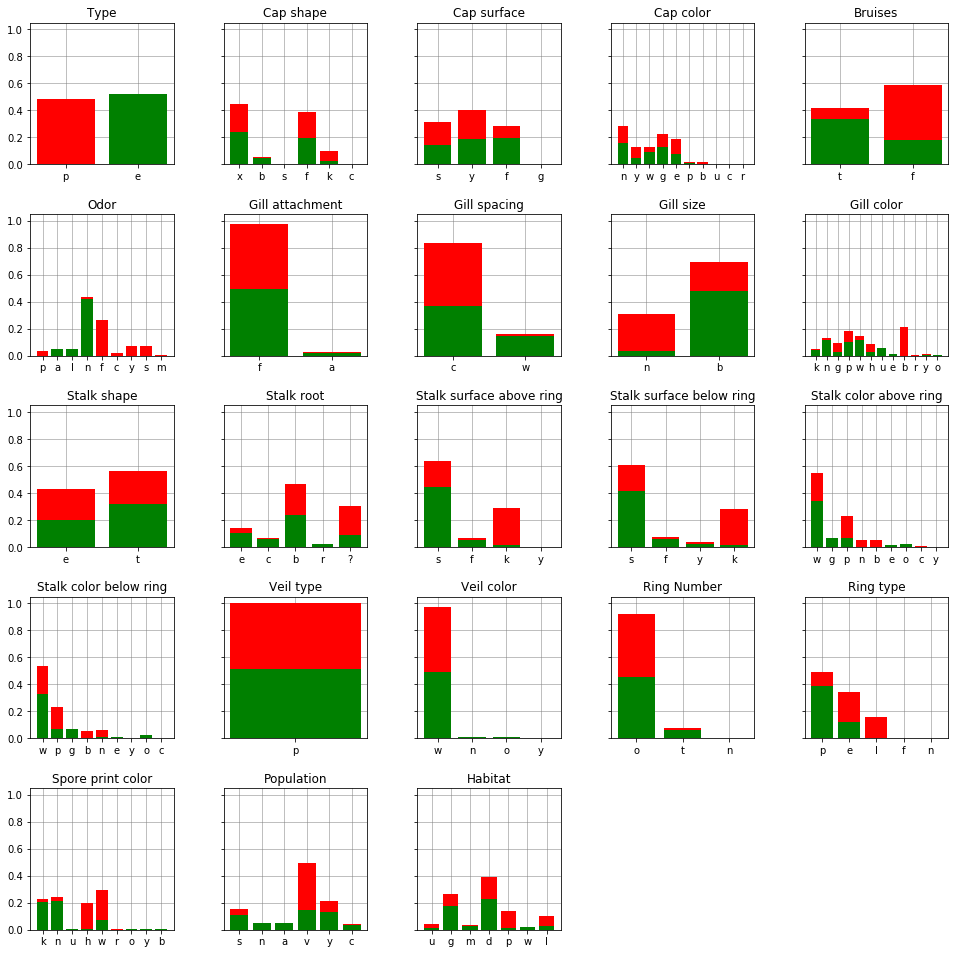

In [115]:
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

fig,axs=plt.subplots(5,5, figsize=(15,15), sharey=True)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)

axs=trim_axs(axs,len(header))
Cont=0
for ax,Variable in zip(axs,header):
    Data={}

    Total=8124
    for i in range(Total):
        t=dataset.iloc[i,Cont]
        #for t in dataset.iloc[i,Cont]:


        if t in Data.keys():
            Data[t]=Data[t]+1
        else:
          Data[t]=1

    DataE={}
    DataP={}  
    
    for Nombre in Data.keys():
        DataE[Nombre]=0
        DataP[Nombre]=0
    
    for i in range(Total):
        t=dataset.iloc[i,Cont]
        if dataset.iloc[i,0]=='e':
            DataE[t]=DataE[t]+1

        if dataset.iloc[i,0]=='p':
            DataP[t]=DataP[t]+1
    

    for Key in Data:
        Data[Key]=Data[Key]/Total
    for Key in DataP:
        DataP[Key]=DataP[Key]/Total
    for Key in DataE:
        DataE[Key]=DataE[Key]/Total
    
    for Nombre in Data.keys():
        if Nombre not in DataE.keys():
            DataE[Nombre]=0
        if Nombre not in DataP.keys():
            DataP[Nombre]=0
    

    
    Names=list(Data.keys())
    ValuesE=list(DataE.values())
    ValuesP=list(DataP.values())
    
    Tipo=['Poisonous','Edible']
    ax.bar(Names,ValuesE, color='g')
    ax.bar(Names,ValuesP, bottom=ValuesE, color='r')
    ax.set_axisbelow(True)
    ax.grid(linestyle='-', linewidth='0.5', color='gray')
    ax.set_title(Variable)
#    ax.legend(Tipo,bbox_to_anchor=(1.04,1),loc="upper left")
    Cont=Cont+1

Hago lo mismo que antes pero ahora dibujándolas por separado (para poder guardarlas como archivo .pdf hay que descomentar las últimas lineas) y les pongo la leyenda

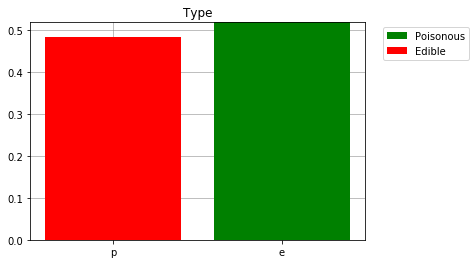

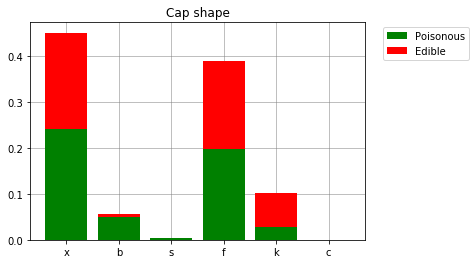

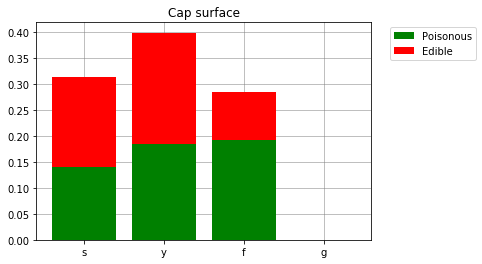

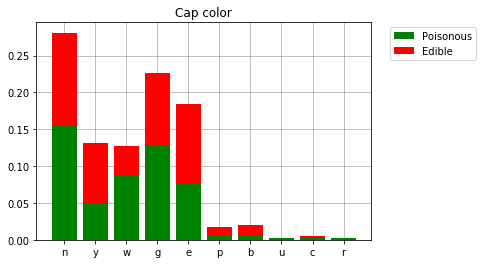

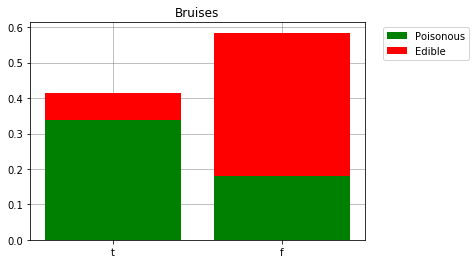

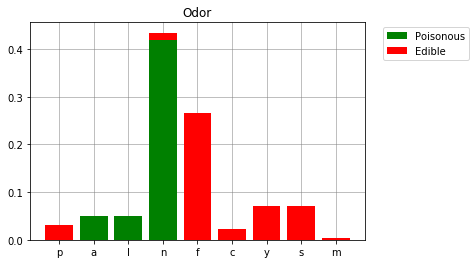

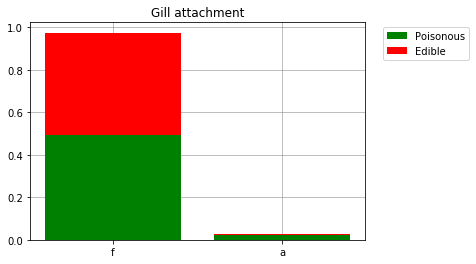

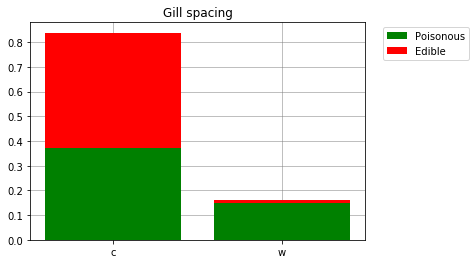

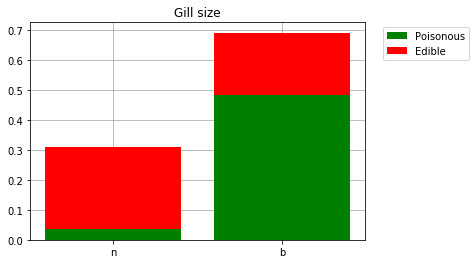

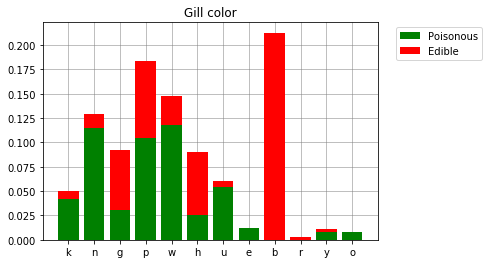

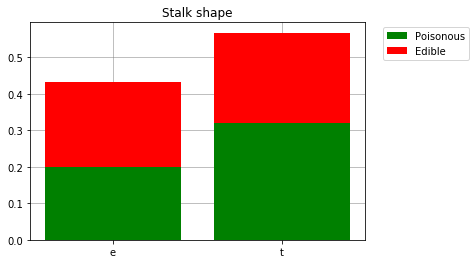

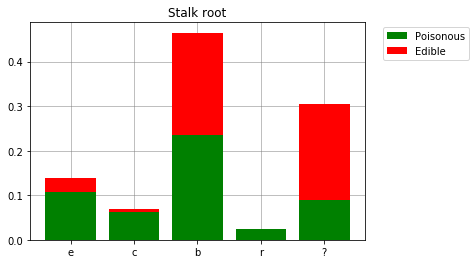

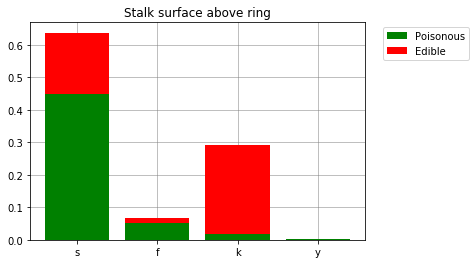

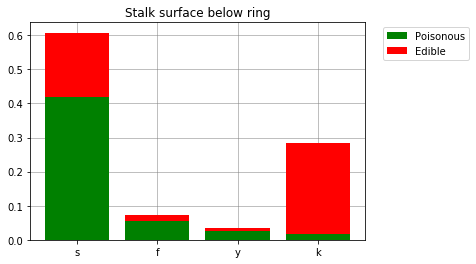

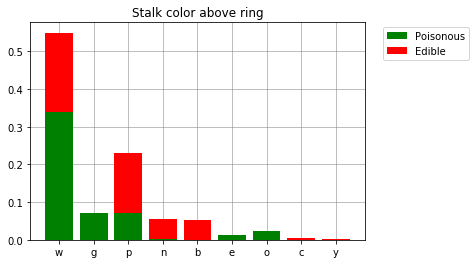

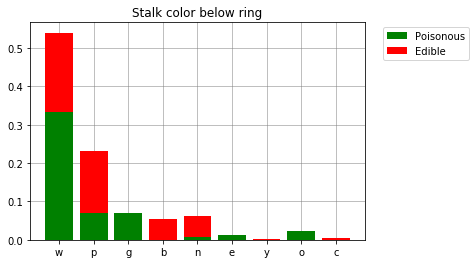

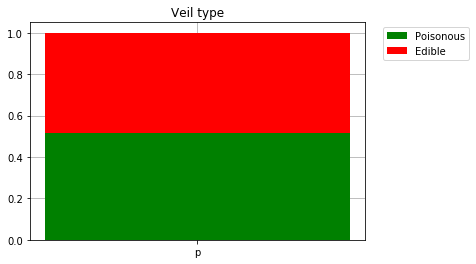

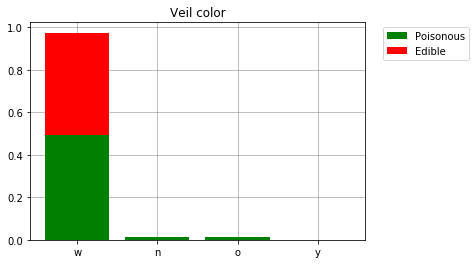

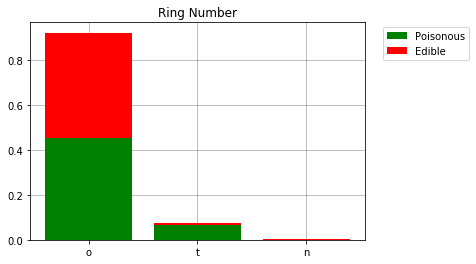

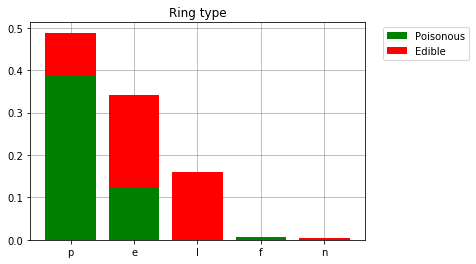

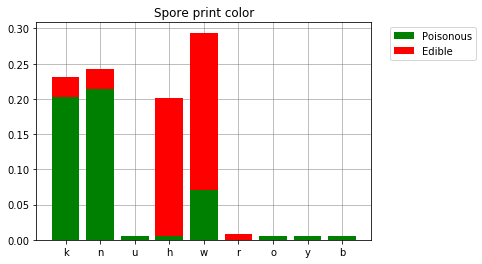

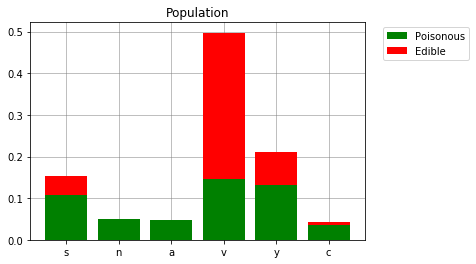

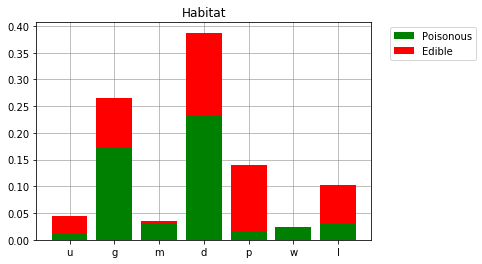

In [119]:
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
Cont=0
for ax,Variable in zip(axs,header):
    Data={}

    Total=8124
    for i in range(Total):
        t=dataset.iloc[i,Cont]
        #for t in dataset.iloc[i,Cont]:


        if t in Data.keys():
            Data[t]=Data[t]+1
        else:
          Data[t]=1

    DataE={}
    DataP={}  
    
    for Nombre in Data.keys():
        DataE[Nombre]=0
        DataP[Nombre]=0
    
    for i in range(Total):
        t=dataset.iloc[i,Cont]
        if dataset.iloc[i,0]=='e':
            DataE[t]=DataE[t]+1

        if dataset.iloc[i,0]=='p':
            DataP[t]=DataP[t]+1
    

    for Key in Data:
        Data[Key]=Data[Key]/Total
    for Key in DataP:
        DataP[Key]=DataP[Key]/Total
    for Key in DataE:
        DataE[Key]=DataE[Key]/Total
    
    for Nombre in Data.keys():
        if Nombre not in DataE.keys():
            DataE[Nombre]=0
        if Nombre not in DataP.keys():
            DataP[Nombre]=0
    

    
    Names=list(Data.keys())
    ValuesE=list(DataE.values())
    ValuesP=list(DataP.values())
    
    
    Tipo=['Poisonous','Edible']
    fig, ax = plt.subplots()
    im=ax.bar(Names,ValuesE, color='g')
    ax.bar(Names,ValuesP, bottom=ValuesE, color='r')
    ax.set_axisbelow(True)
    ax.grid(linestyle='-', linewidth='0.5', color='gray')
    ax.set_title(Variable)
    ax.legend(Tipo,bbox_to_anchor=(1.04,1),loc="upper left")
    
    Cont=Cont+1    

    ax.set_title(Variable)
    
    

    #plt.savefig("Histograma variable " + str(Cont) + ".pdf",bbox_inches='tight')
    #Odor es la variable 6
    plt.show()

Para poder manejar los missing values hago las tablas de contingencia de cada par de variables (para guardarlas como .pdf descomentar las últimas lineas)

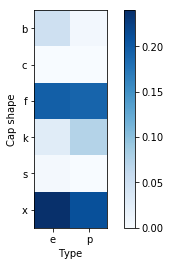

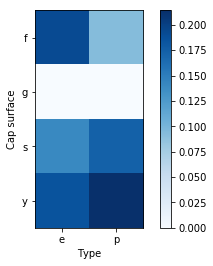

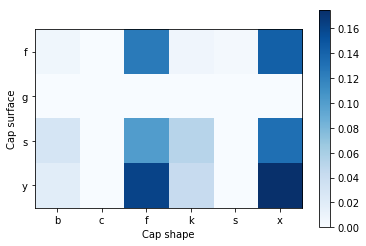

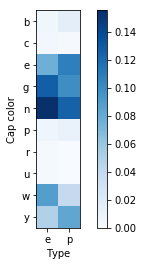

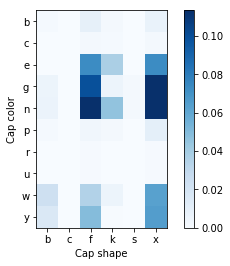

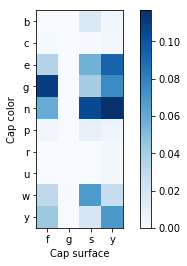

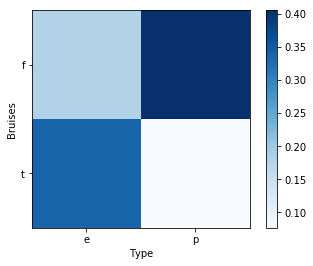

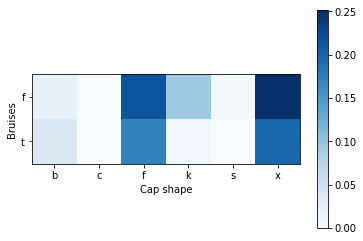

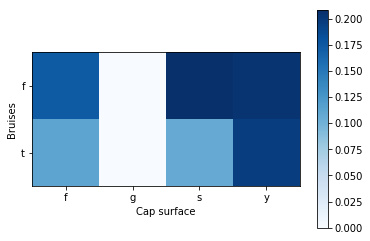

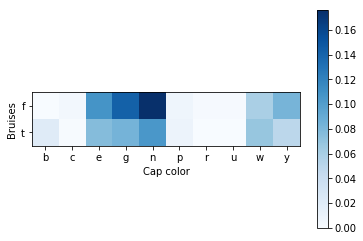

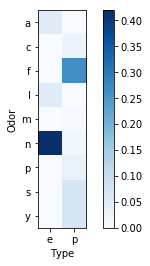

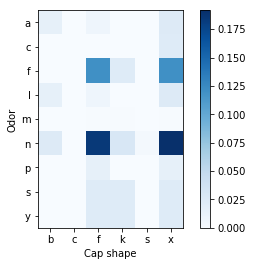

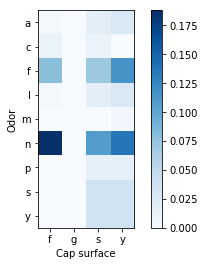

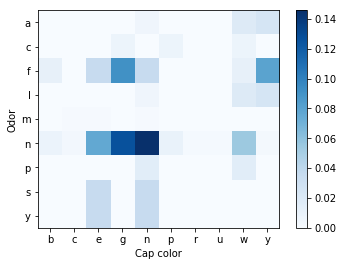

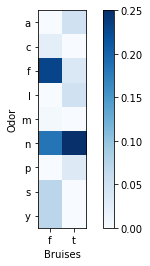

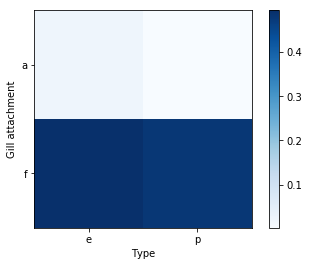

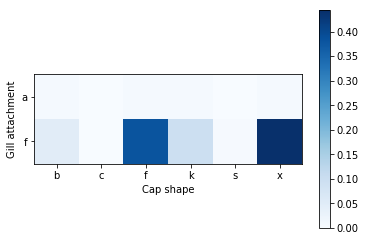

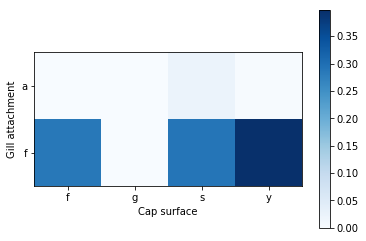

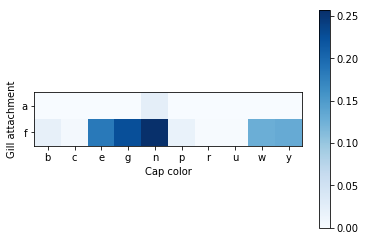

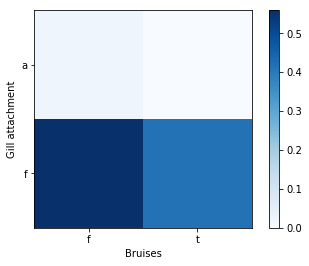

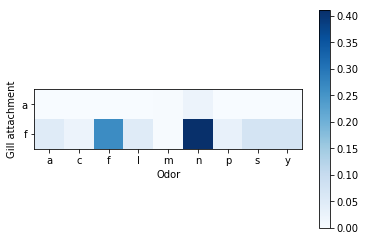

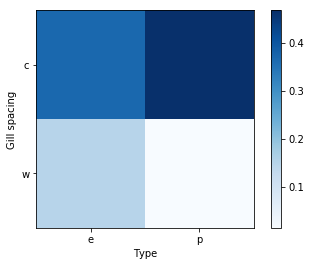

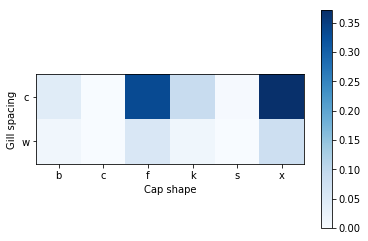

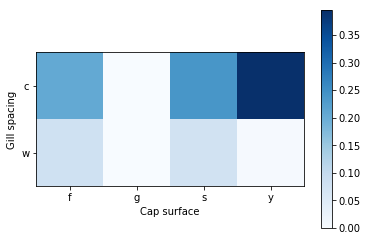

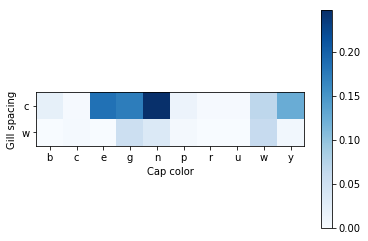

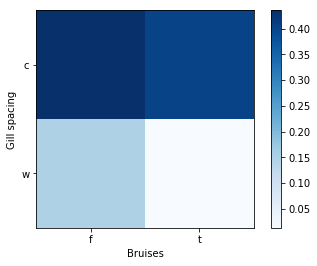

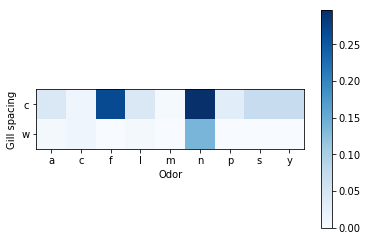

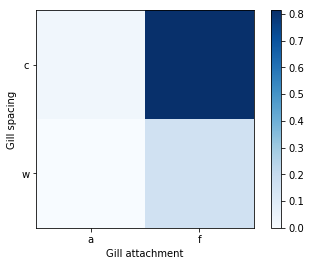

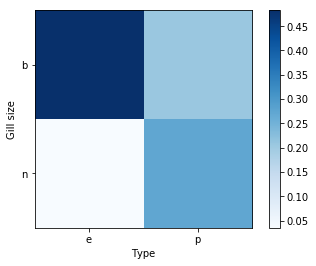

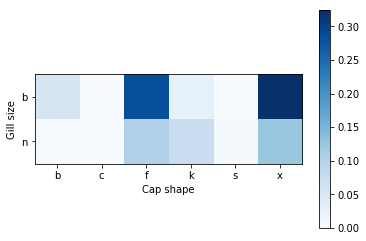

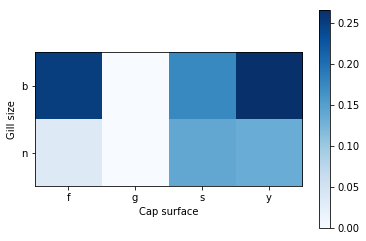

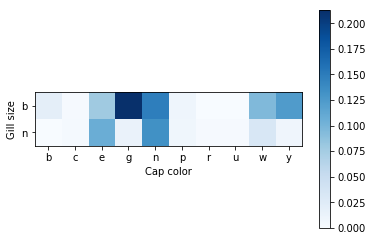

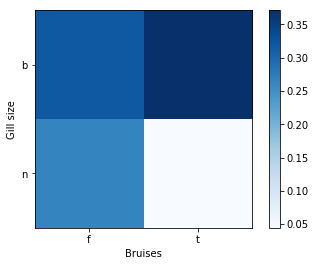

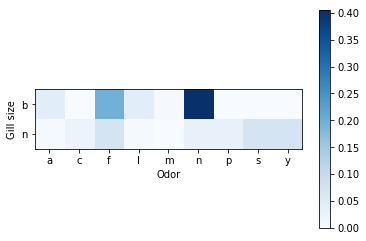

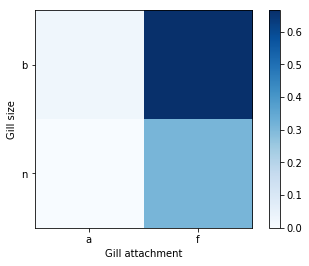

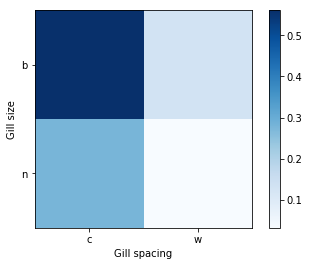

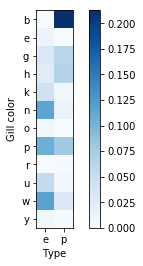

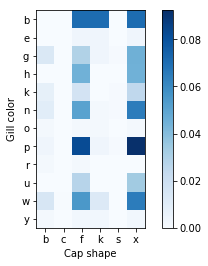

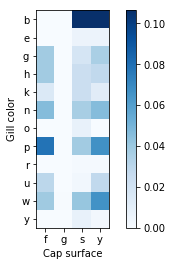

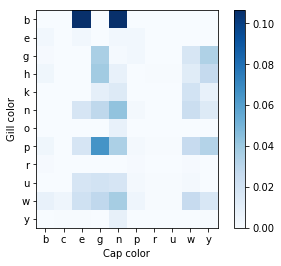

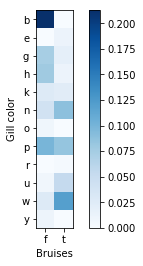

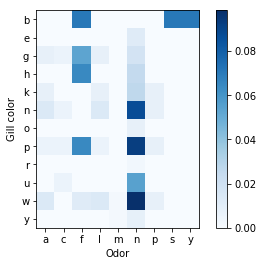

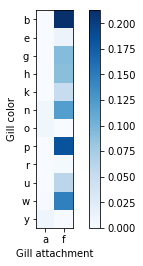

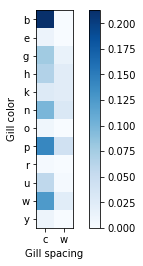

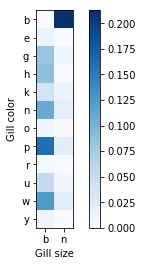

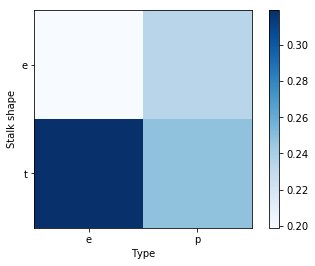

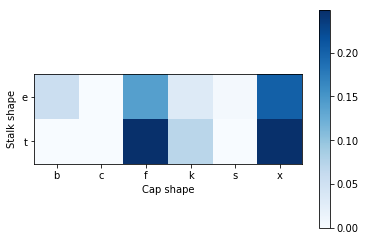

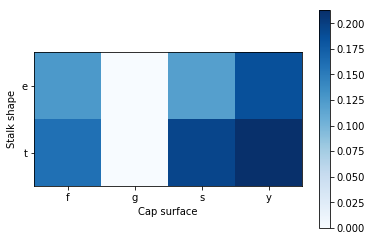

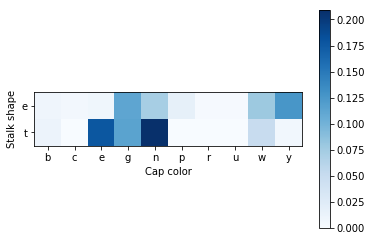

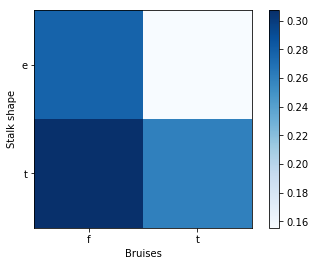

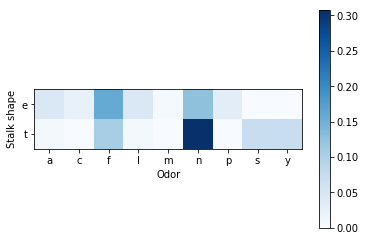

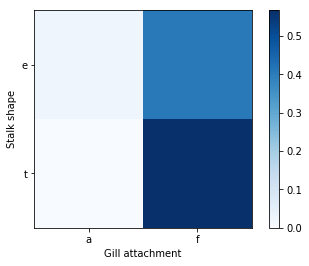

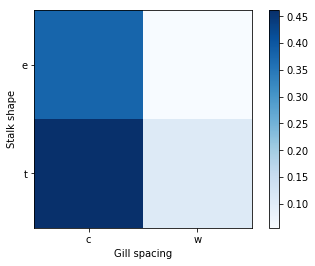

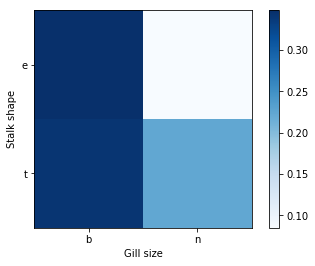

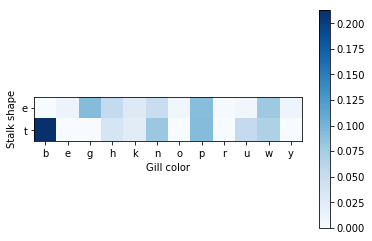

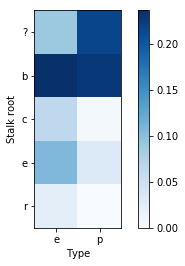

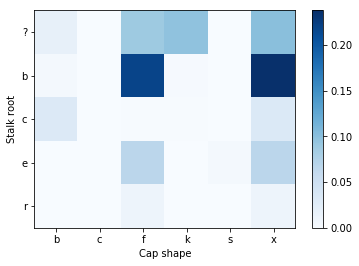

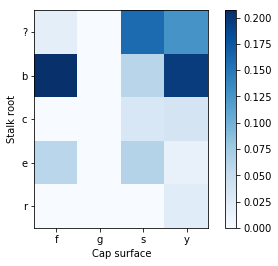

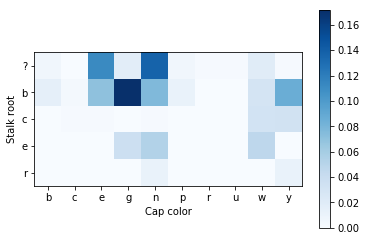

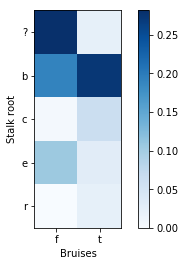

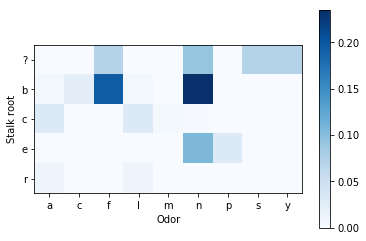

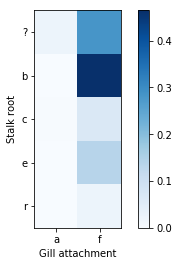

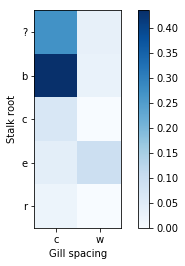

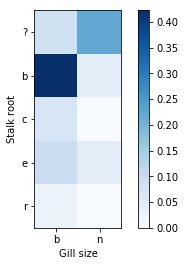

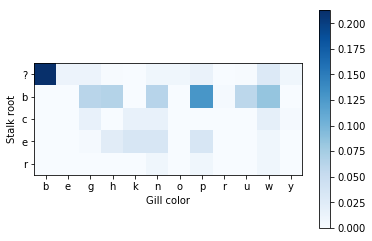

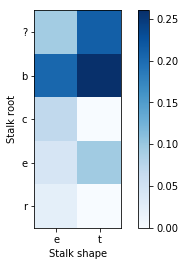

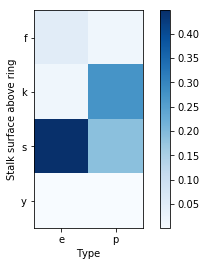

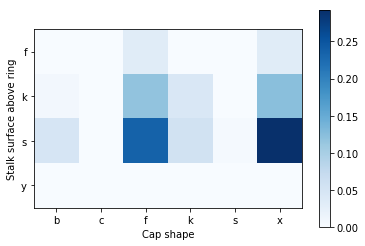

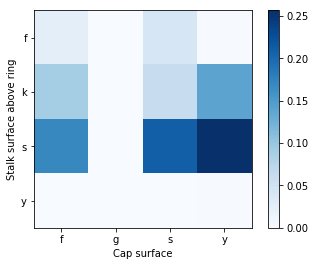

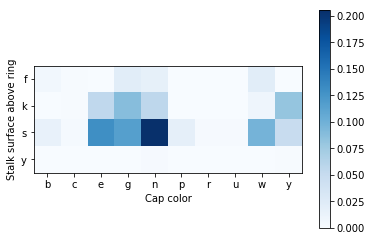

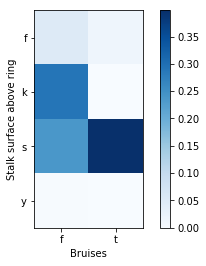

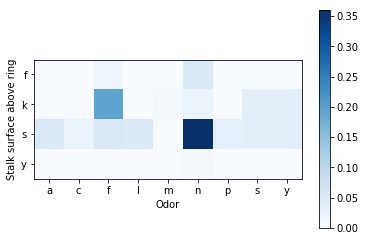

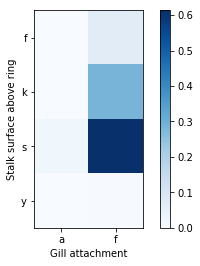

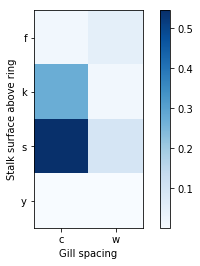

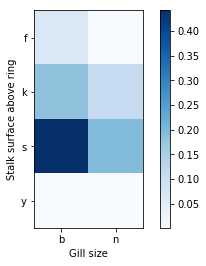

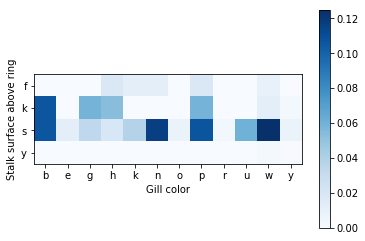

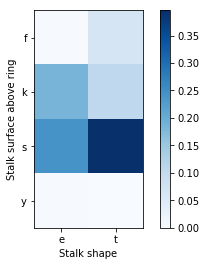

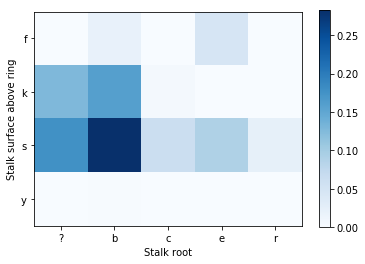

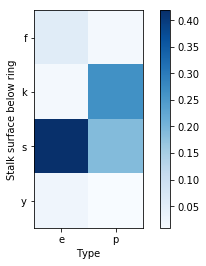

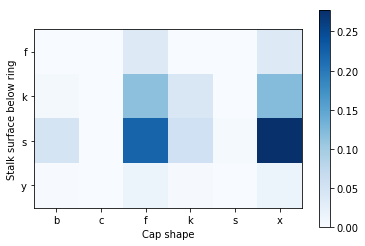

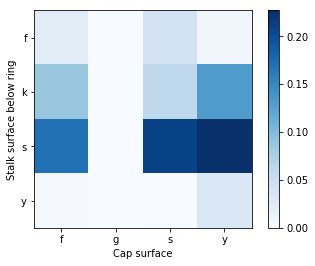

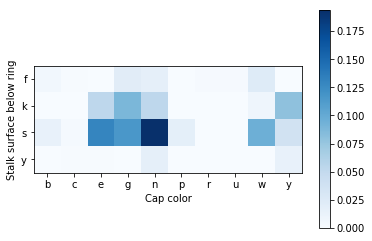

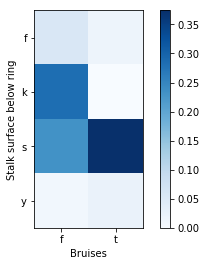

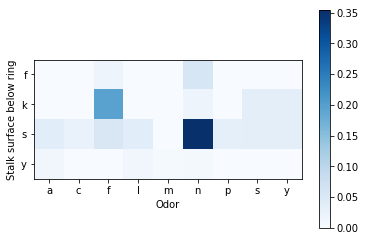

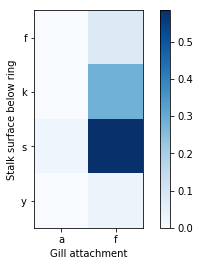

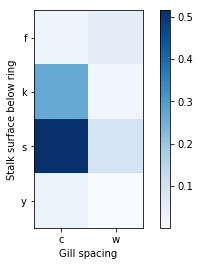

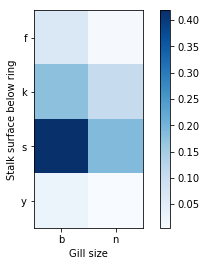

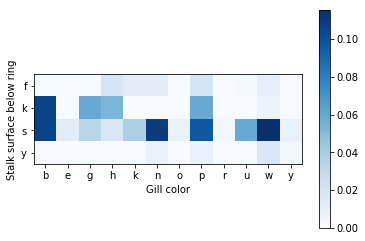

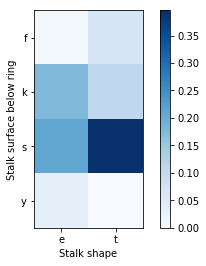

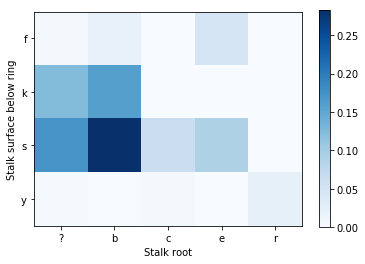

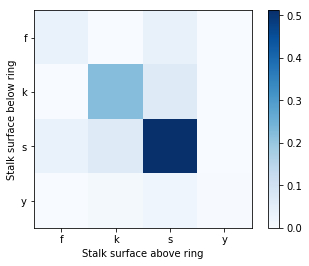

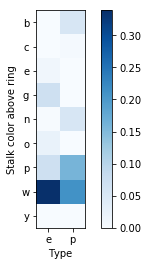

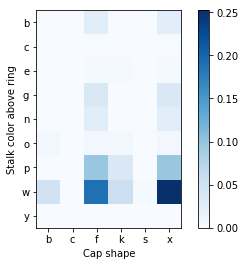

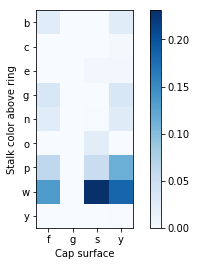

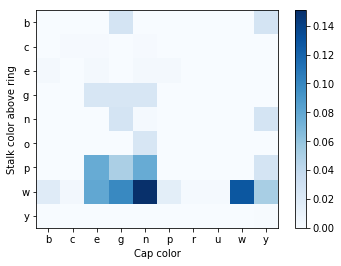

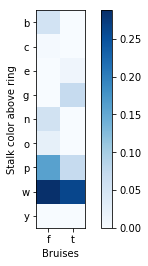

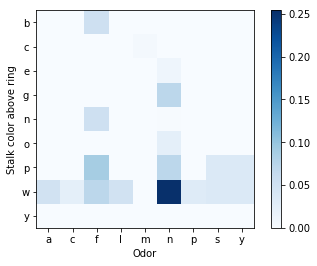

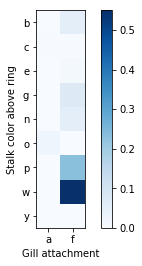

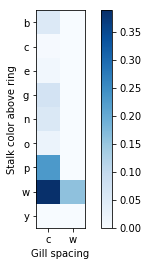

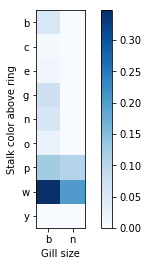

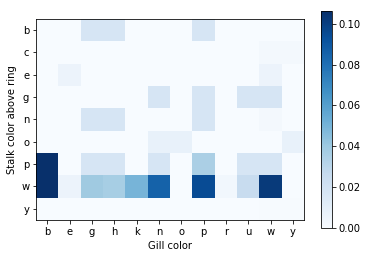

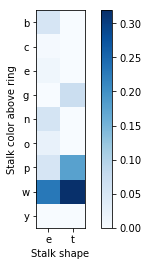

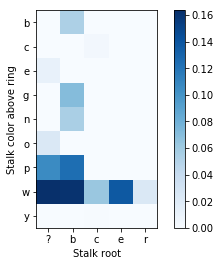

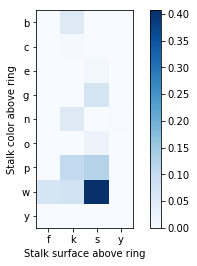

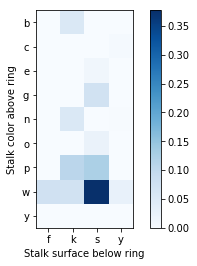

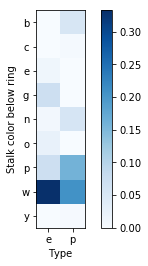

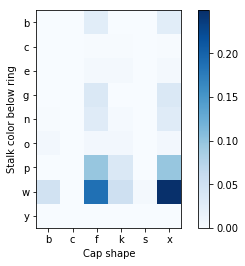

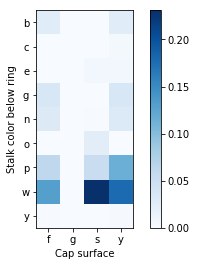

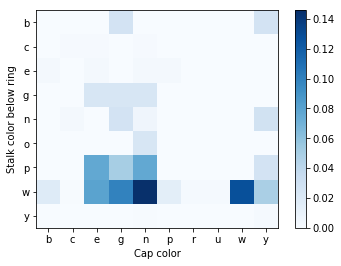

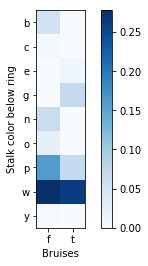

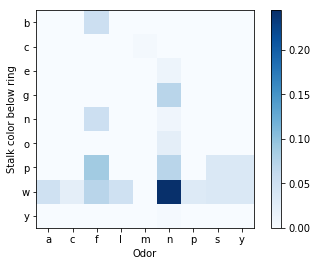

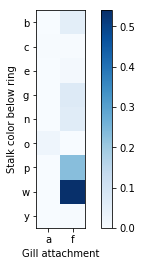

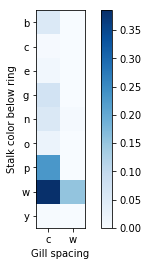

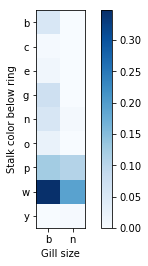

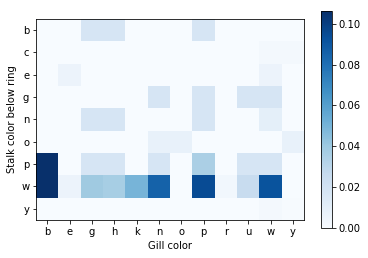

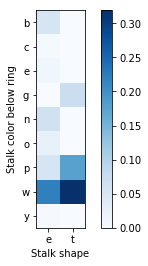

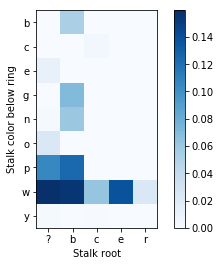

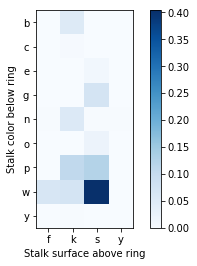

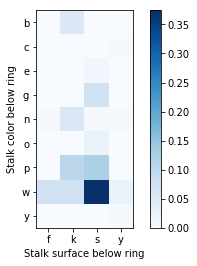

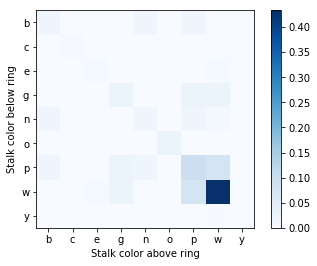

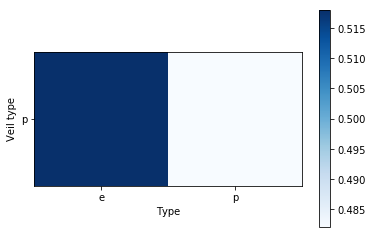

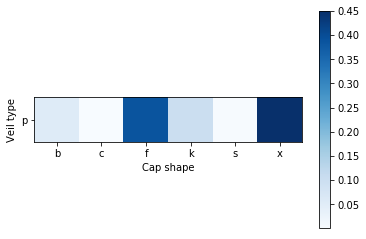

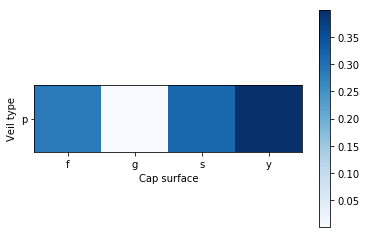

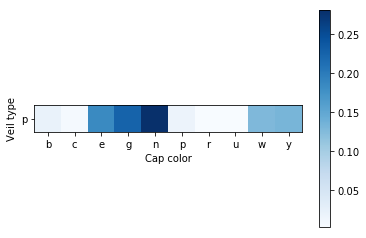

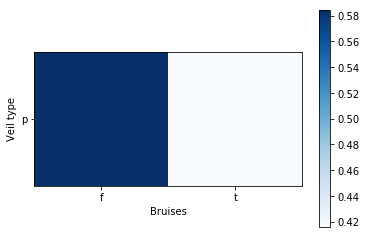

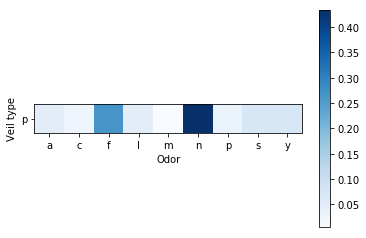

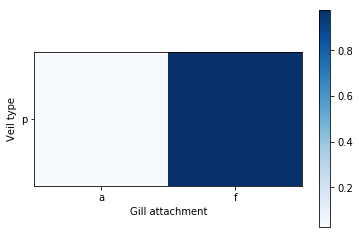

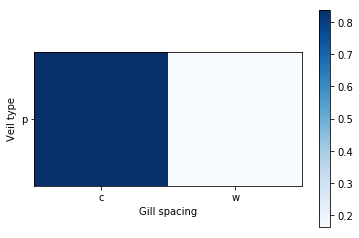

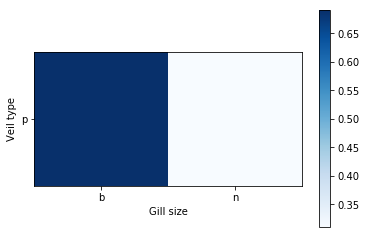

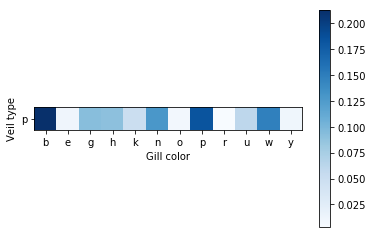

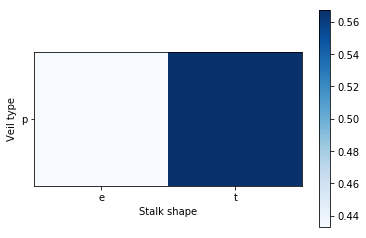

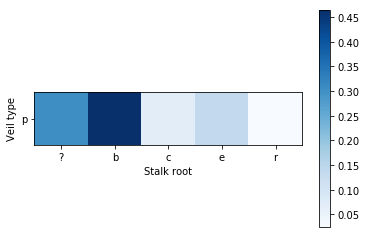

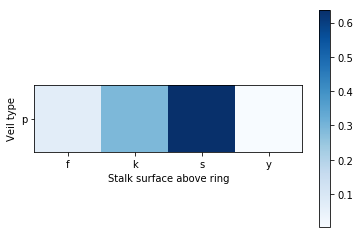

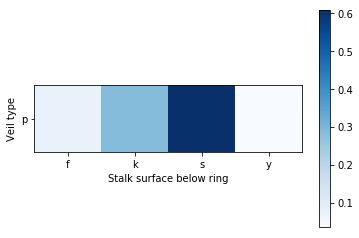

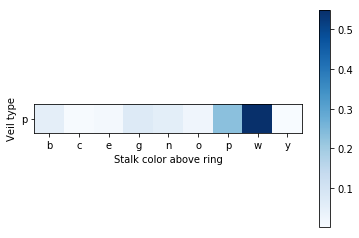

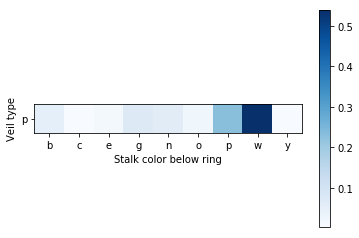

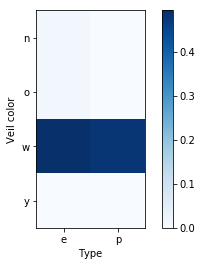

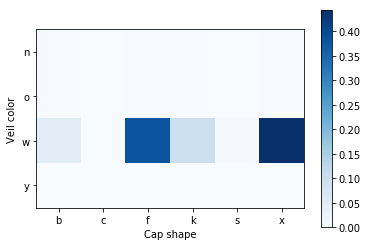

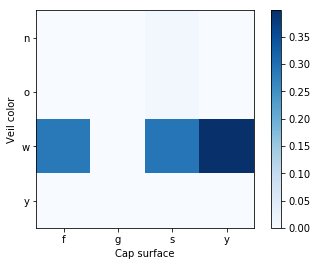

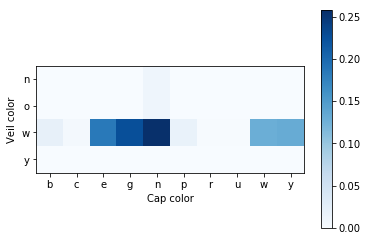

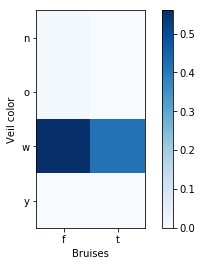

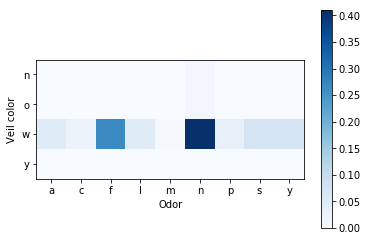

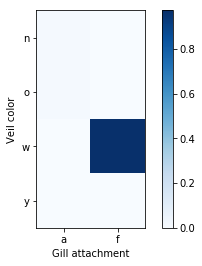

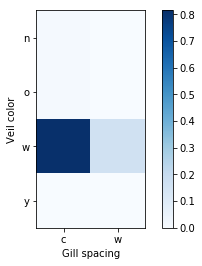

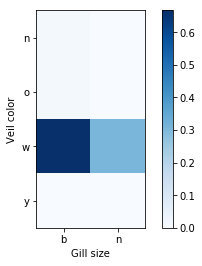

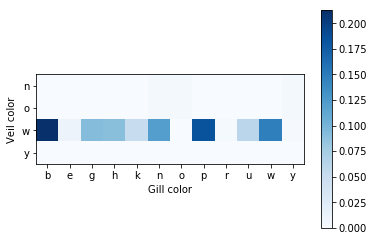

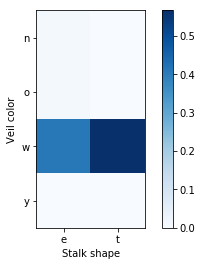

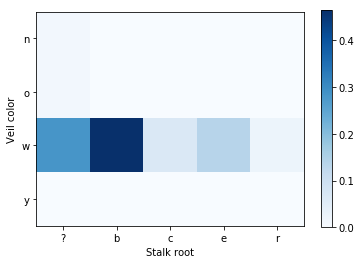

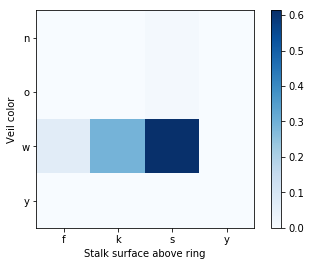

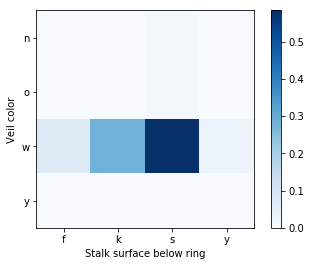

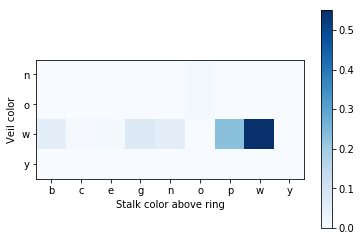

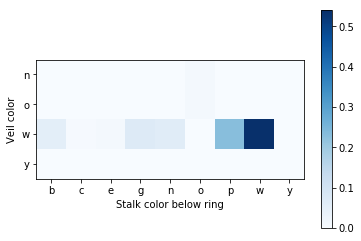

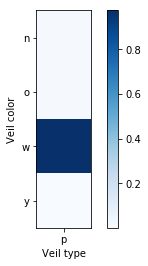

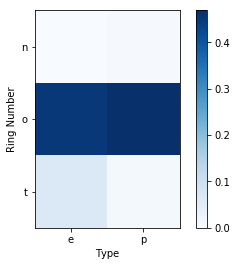

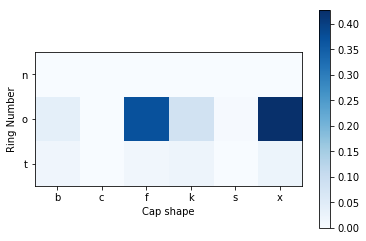

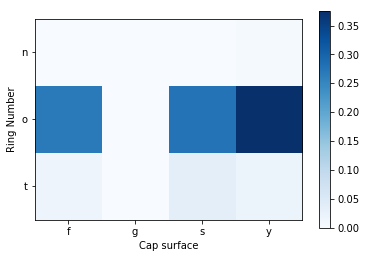

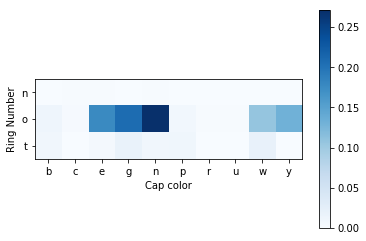

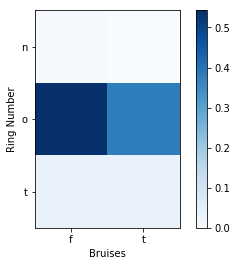

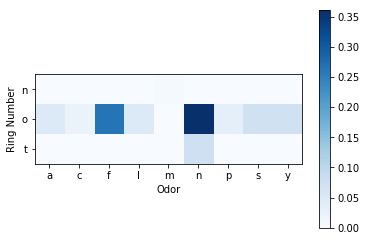

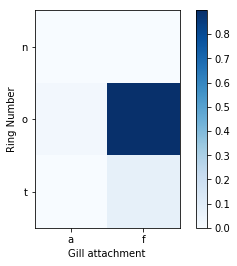

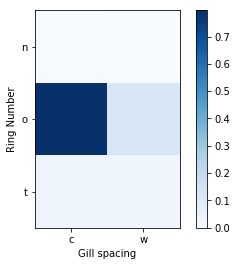

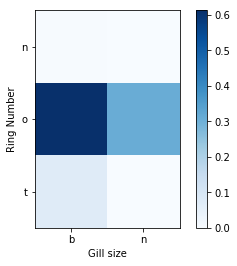

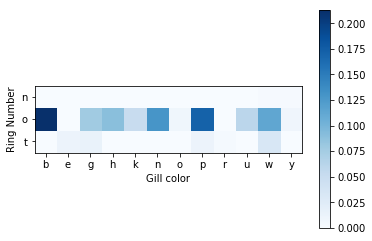

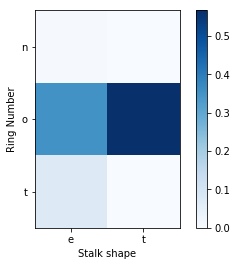

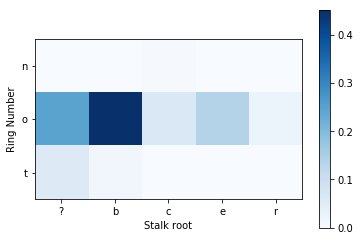

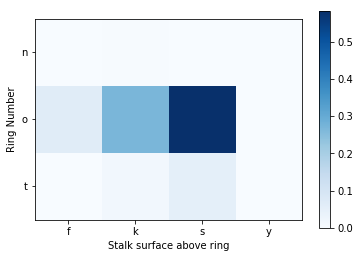

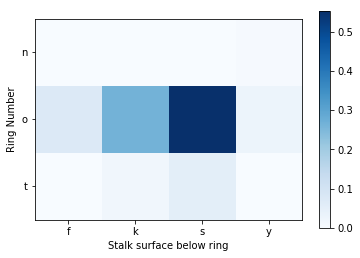

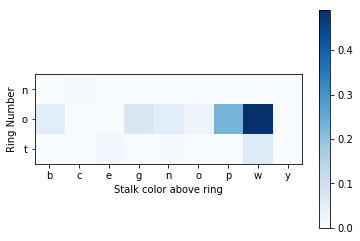

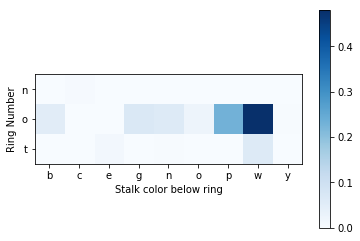

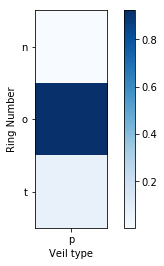

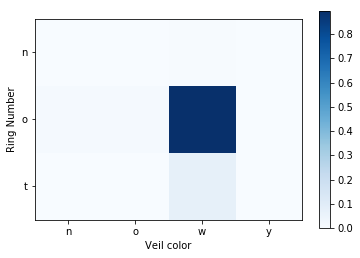

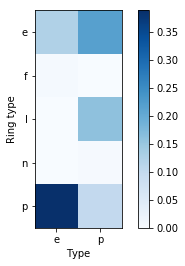

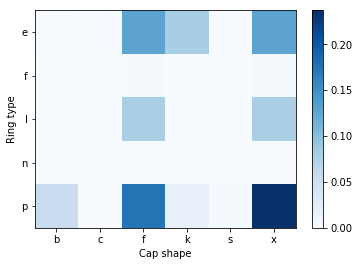

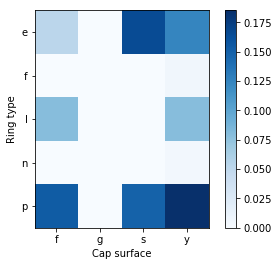

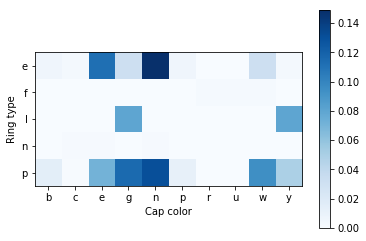

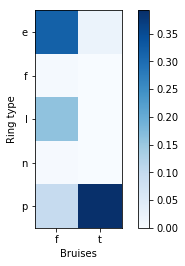

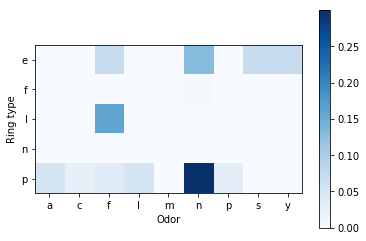

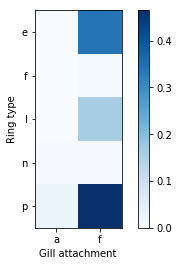

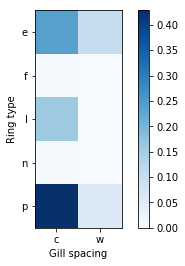

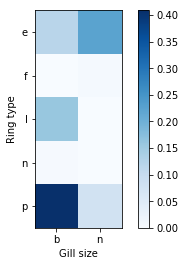

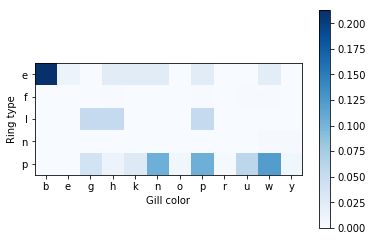

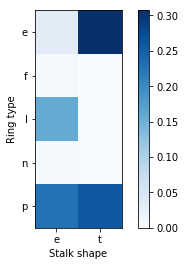

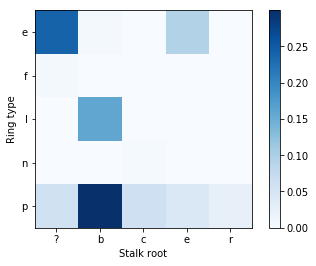

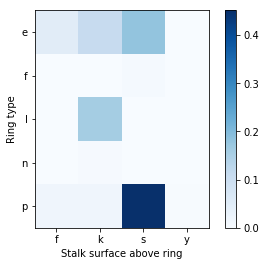

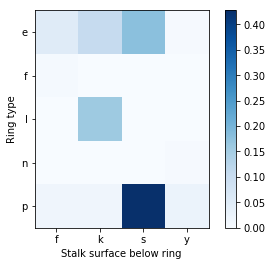

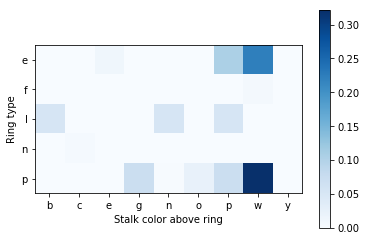

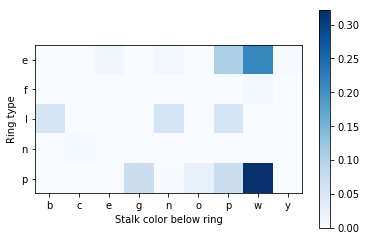

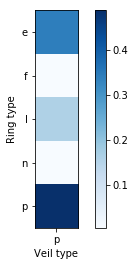

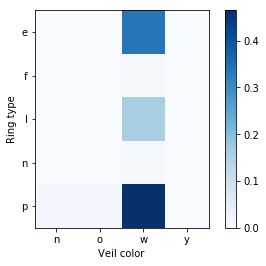

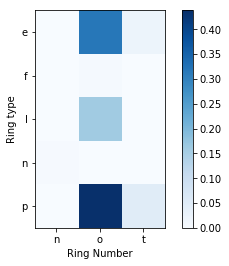

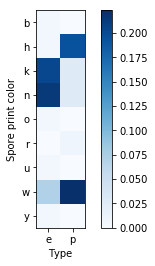

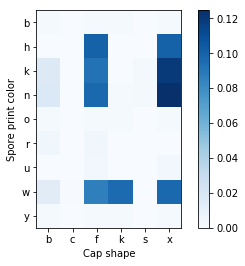

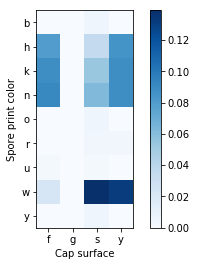

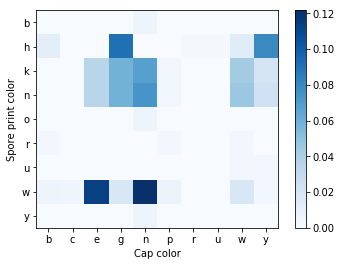

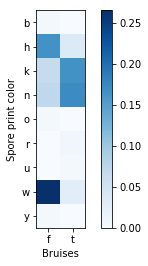

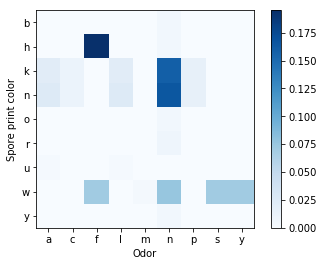

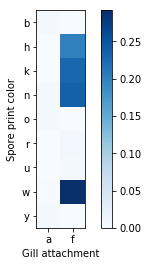

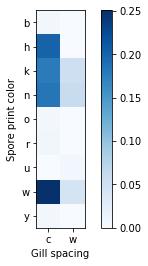

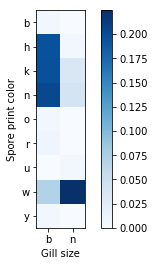

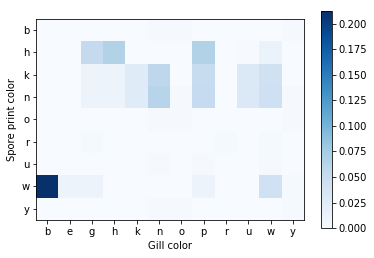

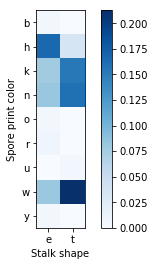

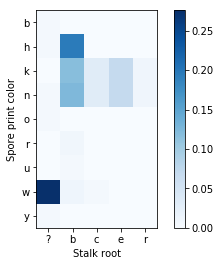

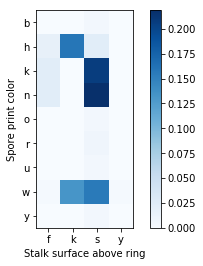

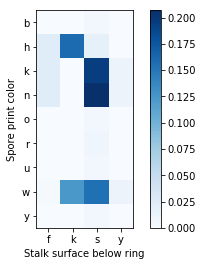

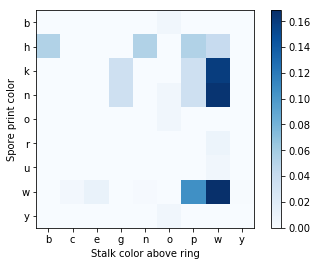

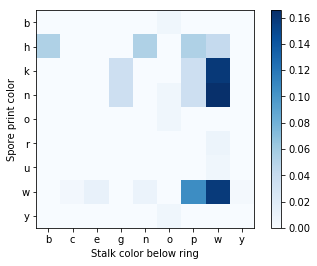

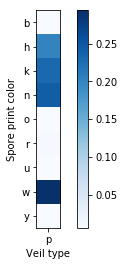

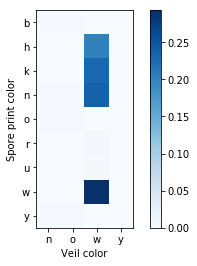

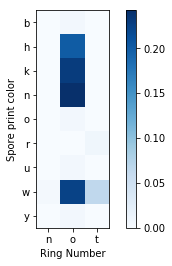

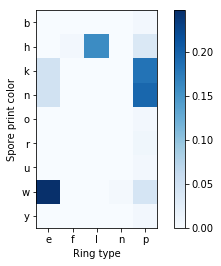

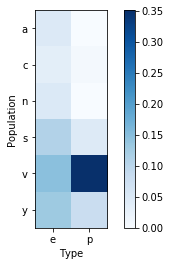

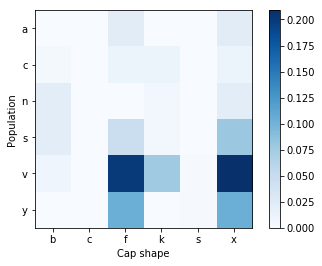

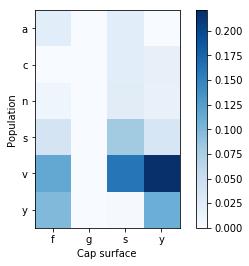

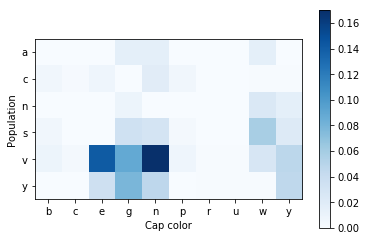

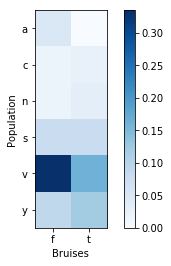

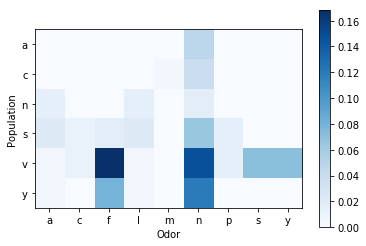

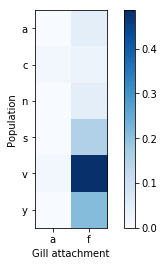

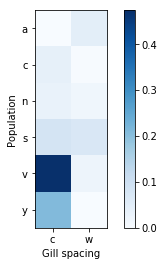

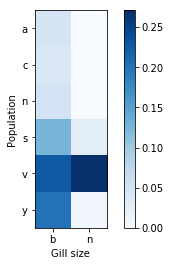

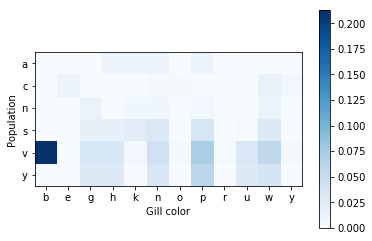

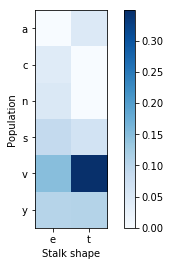

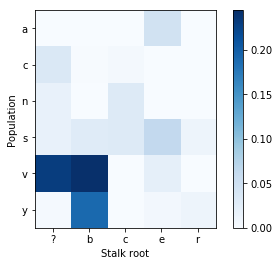

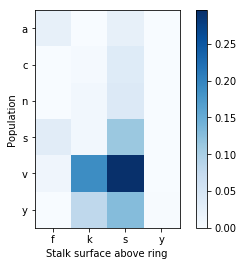

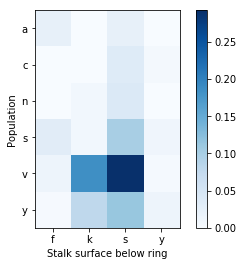

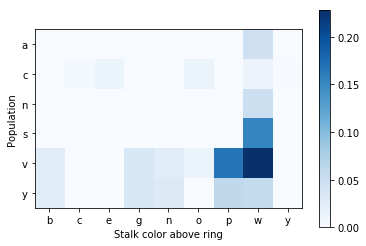

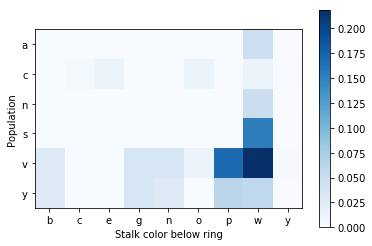

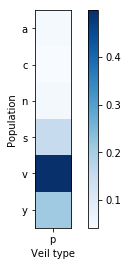

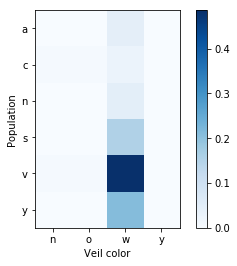

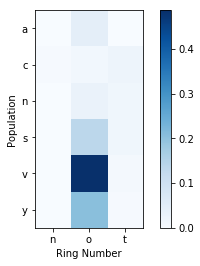

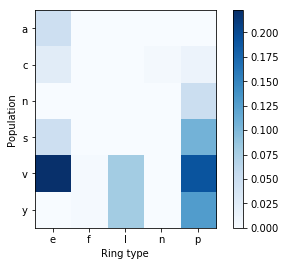

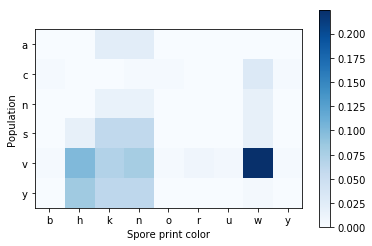

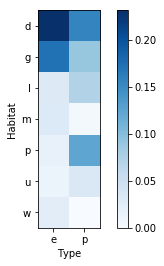

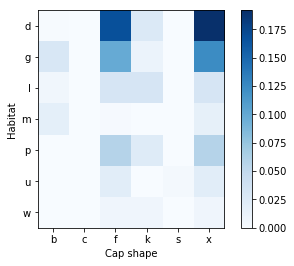

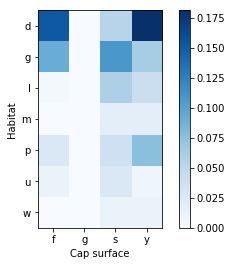

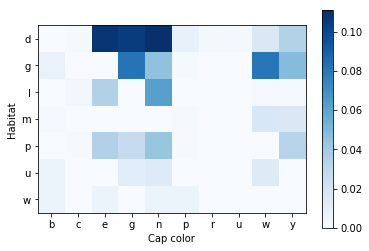

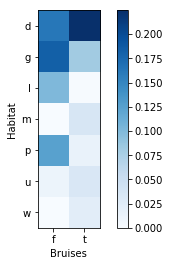

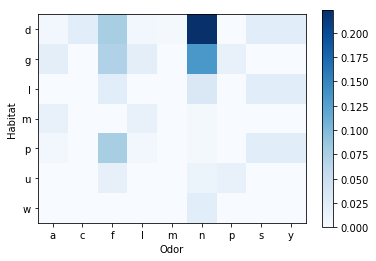

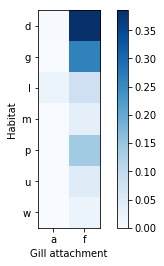

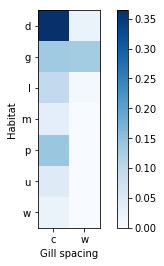

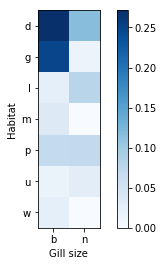

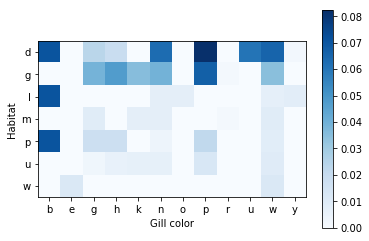

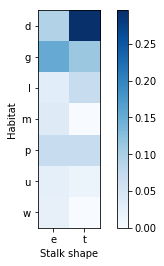

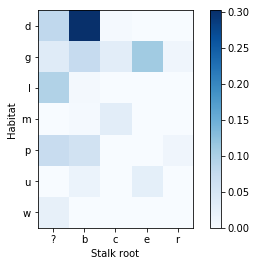

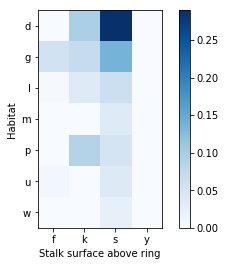

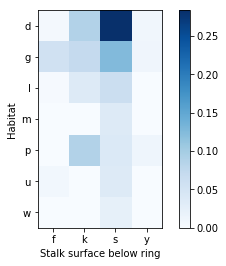

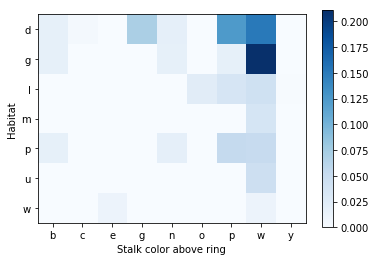

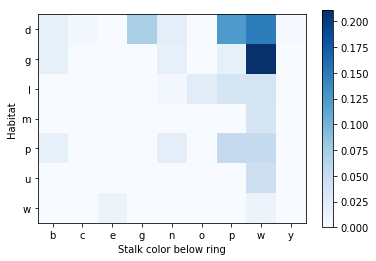

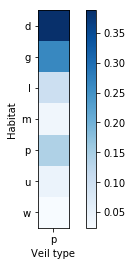

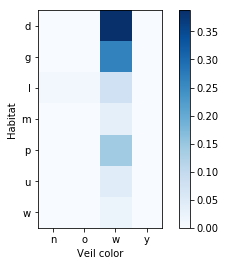

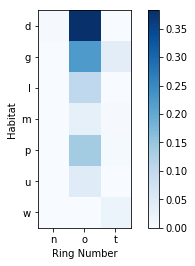

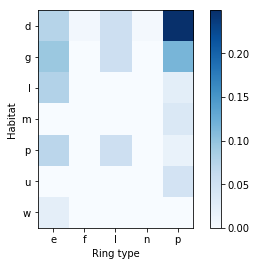

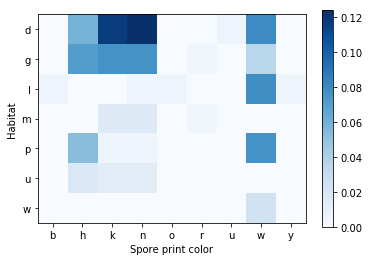

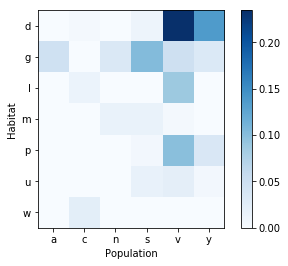

In [117]:
Cont=0
Total=8124
Mat=np.zeros([len(header),len(header)])

for u in range(len(header)):
    for v in range(len(header)):


        if (u > v) :
            
            
            Data_1=[]
            Data_2=[]


            for i in range(Total):
                t=dataset.iloc[i,u]
                if t not in Data_1:
                    Data_1.append(t)

                t=dataset.iloc[i,v]
                if t not in Data_2:
                    Data_2.append(t)

            Data_1=sorted(Data_1)
            Data_2=sorted(Data_2)
            
            Cont=np.zeros([len(Data_1),len(Data_2)])
            
            for i in range(Total):
                [a,b]=[dataset.iloc[i,u],dataset.iloc[i,v]]
                Cont[Data_1.index(a)][Data_2.index(b)]+=1
                
            #print(Cont)
            
            Cont_2=Cont/(sum(sum(Cont)))
            
            fig, ax = plt.subplots()
            
            
            cmap=plt.cm.Blues
            im=ax.imshow(Cont_2, cmap=cmap)
            #patches =[mpatches.Patch(color=cmap[i],label=labels[i]) for i in cmap]
            fig.colorbar(im)
            
            
            ax.set_xticks(np.arange(len(Data_2)))
            ax.set_yticks(np.arange(len(Data_1)))
            
            ax.set_xticklabels(Data_2)
            ax.set_yticklabels(Data_1)
            
            plt.xlabel(header[v])
            plt.ylabel(header[u])
            
            plt.savefig("Variable"+str(v)+"variable" + str(u) +".pdf")
            
            plt.show()

Genero un nuevo conjunto de datos que solo contenga las variables 'Type' y 'Odor'

In [92]:
Total=8124
with open("NuevoDataSet.txt","w") as File:
    File.write("Type,Odor\n")
    for i in range(Total):
        t_0=dataset.iloc[i,0]
        t_1=dataset.iloc[i,5]
        File.write(t_0+","+t_1+'\n')
        
File.close()

In [93]:
# Read Dataset
NuevoDataset = pd.read_csv('C:\\Users\\lsanc\\Desktop\\Jupyter Notebooks\\Practica 1 ml clase\\Otro\\NuevoDataSet.txt',delimiter=',',header=0)
NuevoDataset

,Type,Odor
0,p,p
1,e,a
2,e,l
3,p,p
4,e,n
5,e,a
6,e,a
7,e,l
8,p,p
9,e,a


In [94]:
# Header
header = []
for row in NuevoDataset:
    header.append(row)
header

['Type', 'Odor']

Vuelvo a dinujar los histogramas

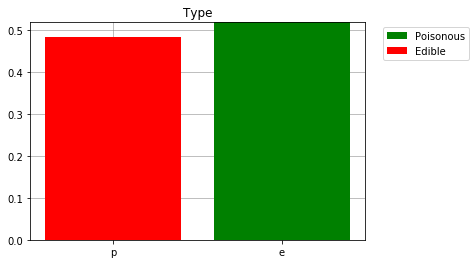

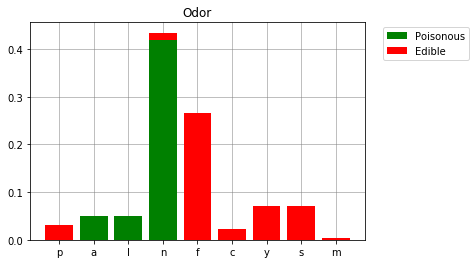

In [95]:
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]
Cont=0
for ax,Variable in zip(axs,header):
    Data={}

    Total=8124
    for i in range(Total):
        t=NuevoDataset.iloc[i,Cont]
        #for t in dataset.iloc[i,Cont]:


        if t in Data.keys():
            Data[t]=Data[t]+1
        else:
          Data[t]=1

    DataE={}
    DataP={}  
    
    for Nombre in Data.keys():
        DataE[Nombre]=0
        DataP[Nombre]=0
    
    for i in range(Total):
        t=NuevoDataset.iloc[i,Cont]
        if NuevoDataset.iloc[i,0]=='e':
            DataE[t]=DataE[t]+1

        if NuevoDataset.iloc[i,0]=='p':
            DataP[t]=DataP[t]+1
    

    for Key in Data:
        Data[Key]=Data[Key]/Total
    for Key in DataP:
        DataP[Key]=DataP[Key]/Total
    for Key in DataE:
        DataE[Key]=DataE[Key]/Total
    
    for Nombre in Data.keys():
        if Nombre not in DataE.keys():
            DataE[Nombre]=0
        if Nombre not in DataP.keys():
            DataP[Nombre]=0
    

    
    Names=list(Data.keys())
    ValuesE=list(DataE.values())
    ValuesP=list(DataP.values())
    
    
    Tipo=['Poisonous','Edible']
    fig, ax = plt.subplots()
    im=ax.bar(Names,ValuesE, color='g')
    ax.bar(Names,ValuesP, bottom=ValuesE, color='r')
    ax.set_axisbelow(True)
    ax.grid(linestyle='-', linewidth='0.5', color='gray')
    ax.set_title(Variable)
    ax.legend(Tipo,bbox_to_anchor=(1.04,1),loc="upper left")
    
    Cont=Cont+1    

    ax.set_title(Variable)
    
    

    #plt.savefig("Histograma variable " + str(Cont) + ".pdf",bbox_inches='tight')

    plt.show()

Para poder utilizar estos datos en un algoritmo de ML transformo los datos categóricos a binarios usando OneHotEncoder

In [99]:
enc = preprocessing.OneHotEncoder()
X=[]
Total = 8124
for i in range(Total):
    t_0=NuevoDataset.iloc[i,0]
    t_1=NuevoDataset.iloc[i,1]
    X.append([t_0,t_1])
    
enc.fit(X)      

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [100]:
enc.categories_

[array(['e', 'p'], dtype=object),
 array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object)]

Creo un nuevo archivo csv que contenga los datos transformados con OHE

In [103]:
Total=8124
with open("OHEDataset.txt","w") as File:
    for Feature in enc.get_feature_names()[:-1]:
        File.write(Feature+',')
    File.write(enc.get_feature_names()[-1]+"\n")
    for i in range(Total):
        t_0=NuevoDataset.iloc[i,0]
        t_1=NuevoDataset.iloc[i,1]
        T=[t_0,t_1]
        
        A=enc.transform([T]).toarray()
        A=A[0]
        
        for j in A[:-1]:
            j=str(int(j))
            File.write(j+',')
        j=str(int(A[-1]))
        File.write(j+'\n')
        
File.close()